**Step 1: Create and Display Binary Images**

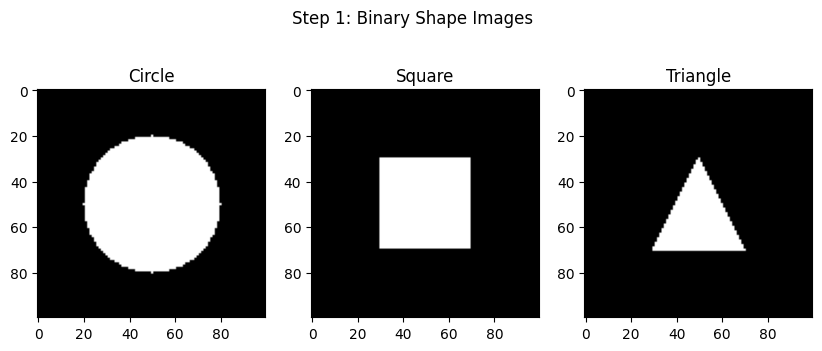

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

imgSize = 100  # Image size

# Create a circle
circleImg = np.zeros((imgSize, imgSize), dtype=np.uint8)
center = (imgSize // 2, imgSize // 2)
radius = 30
cv2.circle(circleImg, center, radius, 1, thickness=-1)

# Create a square
squareImg = np.zeros((imgSize, imgSize), dtype=np.uint8)
squareImg[30:70, 30:70] = 1

# Create a triangle
triangleImg = np.zeros((imgSize, imgSize), dtype=np.uint8)
vertices = np.array([[50, 30], [30, 70], [70, 70]], dtype=np.int32)
cv2.fillPoly(triangleImg, [vertices], 1)

# Display the shapes
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(circleImg, cmap='gray')
plt.title('Circle')

plt.subplot(1, 3, 2)
plt.imshow(squareImg, cmap='gray')
plt.title('Square')

plt.subplot(1, 3, 3)
plt.imshow(triangleImg, cmap='gray')
plt.title('Triangle')

plt.suptitle('Step 1: Binary Shape Images')
plt.show()


**Step 2: Feature Extraction (Area, Perimeter, Circularity)**

In [10]:
def calculate_area(img):
    return np.sum(img)

def calculate_perimeter(img):
    return np.sum(cv2.Canny(img, 100, 200) > 0)

def calculate_circularity(area, perimeter):
    return (4 * np.pi * area) / (perimeter ** 2) if perimeter != 0 else 0

# Circle features
circleArea = calculate_area(circleImg)
circlePerimeter = calculate_perimeter(circleImg)
circleCircularity = calculate_circularity(circleArea, circlePerimeter)

# Square features
squareArea = calculate_area(squareImg)
squarePerimeter = calculate_perimeter(squareImg)
squareCircularity = calculate_circularity(squareArea, squarePerimeter)

# Triangle features
triangleArea = calculate_area(triangleImg)
trianglePerimeter = calculate_perimeter(triangleImg)
triangleCircularity = calculate_circularity(triangleArea, trianglePerimeter)

print("\nStep 2: Extracted Features")
print(f"Circle: Area={circleArea}, Perimeter={circlePerimeter}, Circularity={circleCircularity:.4f}")
print(f"Square: Area={squareArea}, Perimeter={squarePerimeter}, Circularity={squareCircularity:.4f}")
print(f"Triangle: Area={triangleArea}, Perimeter={trianglePerimeter}, Circularity={triangleCircularity:.4f}")



Step 2: Extracted Features
Circle: Area=2821, Perimeter=0, Circularity=0.0000
Square: Area=1600, Perimeter=0, Circularity=0.0000
Triangle: Area=861, Perimeter=0, Circularity=0.0000


**Step 3: Train k-NN Classifier**

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# Combine features into dataset
trainingData = np.array([
    [circleArea, circlePerimeter, circleCircularity],
    [squareArea, squarePerimeter, squareCircularity],
    [triangleArea, trianglePerimeter, triangleCircularity]
])
trainingLabels = np.array([1, 2, 3])  # 1 = Circle, 2 = Square, 3 = Triangle

# Train k-NN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(trainingData, trainingLabels)

print("\nStep 3: k-NN classifier trained with 1 neighbor.")



Step 3: k-NN classifier trained with 1 neighbor.


**Step 4: Test the Classifier**

In [12]:
# You can change testImg to test with different shapes
testImg = circleImg  # Change to squareImg or triangleImg as needed

# Extract features
testArea = calculate_area(testImg)
testPerimeter = calculate_perimeter(testImg)
testCircularity = calculate_circularity(testArea, testPerimeter)
testFeatures = np.array([[testArea, testPerimeter, testCircularity]])

print("\nStep 4: Test Image Features")
print(f"Test Area = {testArea}, Perimeter = {testPerimeter}, Circularity = {testCircularity:.4f}")

# Prediction
predictedLabel = knn.predict(testFeatures)

# Result
shape_dict = {1: "Circle", 2: "Square", 3: "Triangle"}
print(f"Predicted Shape: {shape_dict.get(predictedLabel[0], 'Unknown')}")



Step 4: Test Image Features
Test Area = 2821, Perimeter = 0, Circularity = 0.0000
Predicted Shape: Circle
